In [ ]:
#%pip install -q -r requirements.txt

# Сборный проект №1

### Описание проекта
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

### Содержание
- <a id="Изучение-данных-и-общей-информации"></a>[1 Изучение данных и общей информации](#1-Изучение-данных-и-общей-информации)
- <a id="Подготовка-данных"></a>[2 Подготовка данных](#2-Подготовка-данных)
- <a id="Исследовательский-анализ-данных"></a>[3 Исследовательский анализ данных](#3-Исследовательский-анализ-данных)
- <a id="Составление-портрета-пользователя-каждого-региона"></a>[4 Составление портрета пользователя каждого региона](#4-Составление-портрета-пользователя-каждого-региона)
- <a id="Проверка-гипотез"></a>[5 Проверка гипотез](#5-Проверка-гипотез)
- <a id="Общий-вывод"></a>[6 Общий вывод](#6-Общий-вывод)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

## 1 Изучение данных и общей информации

In [ ]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Описание данных
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.\
Данные за 2016 год могут быть неполными.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Названия столбцов необходимо привести к нижнему регистру. Значения в столбце `Year_of_Release` — год выпуска необходимо привести к целочисленному типу. Необходимо обработать столбец `User_Score` — оценка пользователей, проверить столбцы `Genre` — жанр игры и `Rating` — рейтинг от организации ESRB.

 ## 2 Подготовка данных

Названия столбцов приведем к нижнему регистру.

In [ ]:
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Значения в столбце `year_of_release` приведем к целочисленному типу.

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

Проверим столбец `user_score`.

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значение "tbd" встречается, когда у игры недостаточно отзывов, заменим его на "nan" и приведем данные к числовому типу.

In [ ]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')

Проверим столбец `genre`.

In [ ]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Проверим столбец `rating`.

In [ ]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Посчитаем суммарные продажи во всех регионах и запишем их в столбец `total_sales`.

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [ ]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [ ]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,7590.000000,16715.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679,7.125046,0.533396
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165,1.500006,1.548261
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


Пропуски в остальных столбцах не представляется возможным заполнить логически. К пропускам в этих столбцах привело, скорее всего, отсутствие информации по конкретным играм.

## 3 Исследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы.

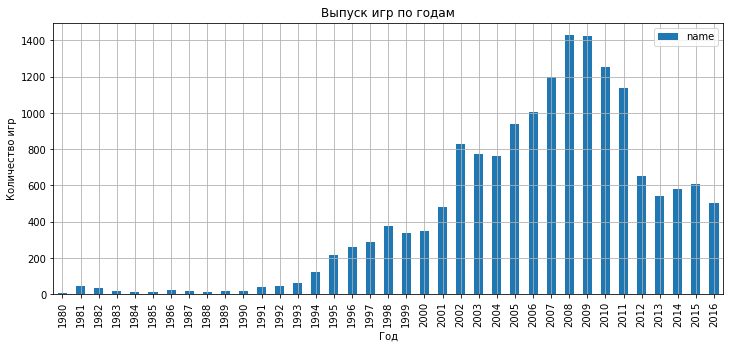

In [ ]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count'
                   ).plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр');

Посмотрим как менялись продажи по годам.

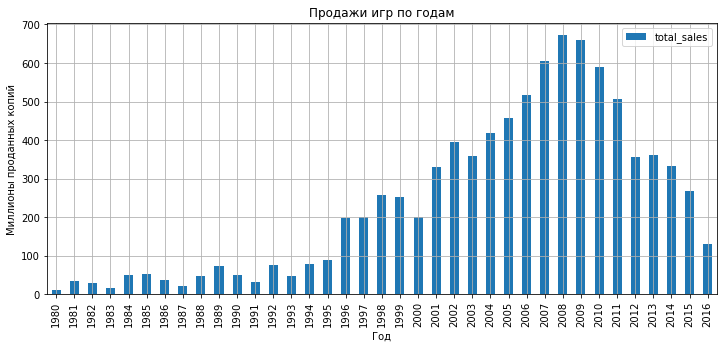

In [ ]:
df.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'
                   ).plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Продажи игр по годам')
plt.xlabel('Год')
plt.ylabel('Миллионы проданных копий');

Важны данные за последние пять лет, т.к. графики сильно поменялись в 2012 году.

Посмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами.

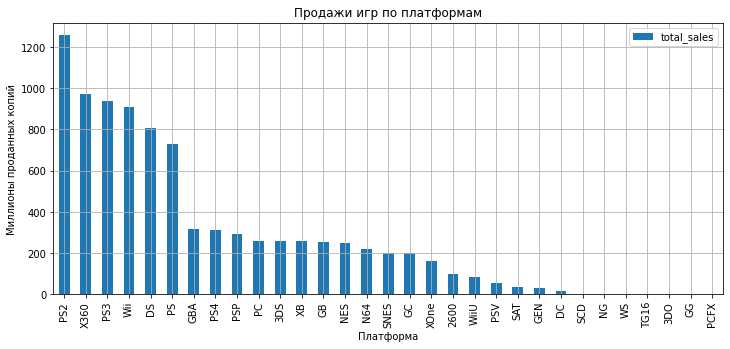

In [ ]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum'
                   ).sort_values('total_sales', ascending=False).plot(kind='bar', grid=True, figsize=(12, 5))
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Миллионы проданных копий');

Выделяется шесть платформ с наибольшими продажами.

In [ ]:
top_6_platforms = df.pivot_table(index='platform', values='total_sales', aggfunc='sum'
                                ).sort_values(by='total_sales', ascending=False).reset_index().head(6)
top_6_platforms

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86


Построим распределения продаж по годам для каждой платформы.

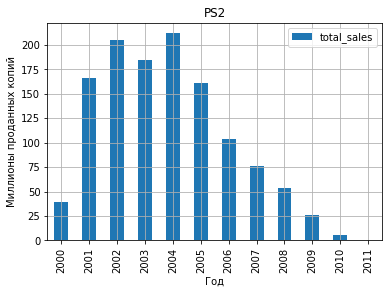

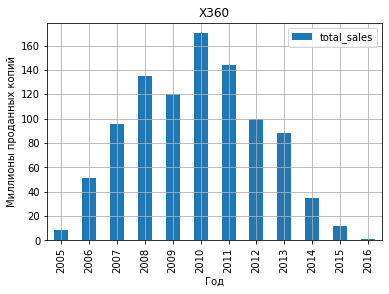

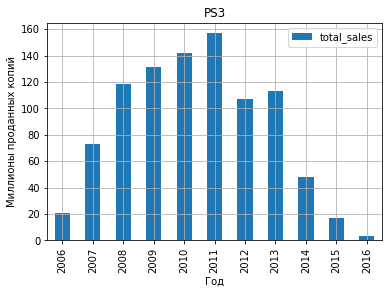

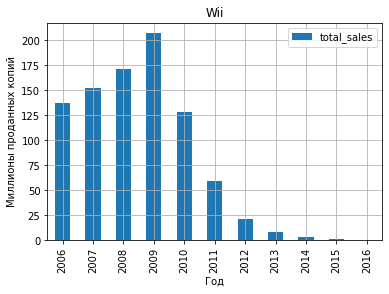

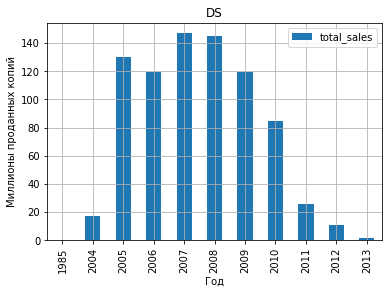

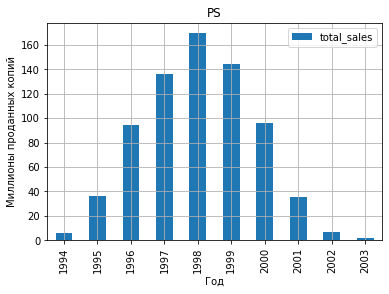

In [ ]:
for name in top_6_platforms['platform']:
    df[df['platform'] == name].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'
                                          ).plot(kind='bar', grid=True, title=name)
    plt.xlabel('Год')
    plt.ylabel('Миллионы проданных копий')

- Платформа появляется и исчезает всреднем за 10 — 12 лет. Максимальные продажи — от 3 до 5 лет. Исходя из анализа количества игр, анализа продаж и анализа платформ определим актуальный период с 2014 года.

Отсортируем таблицу **df**, оставим продажи только начиная с 2014 года. Создадим таблицу **df_current_period**.

In [ ]:
df_current_period = df[df['year_of_release'] > 2013
                      ].pivot_table(index='platform', values='total_sales', aggfunc='sum'
                                   ).sort_values(by='total_sales', ascending=False).reset_index()
df_current_period

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


Посмотрим продажи по платформам за актуальный период.

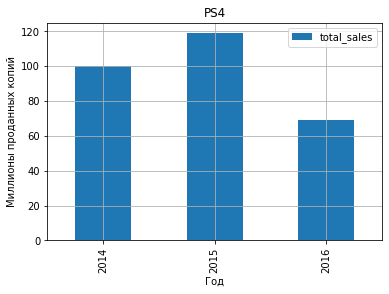

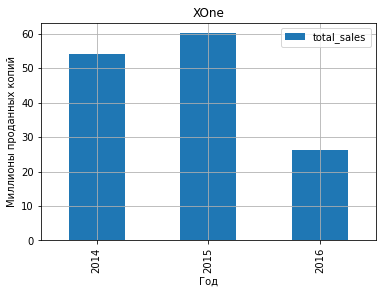

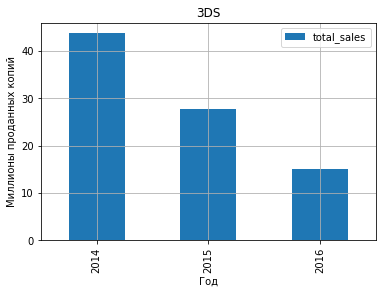

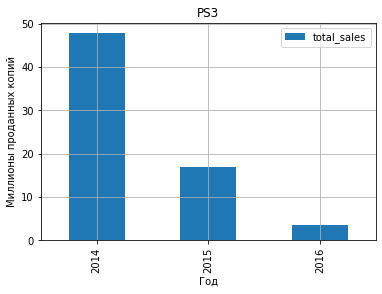

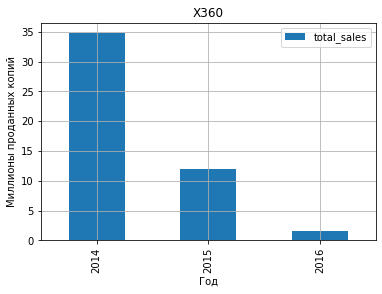

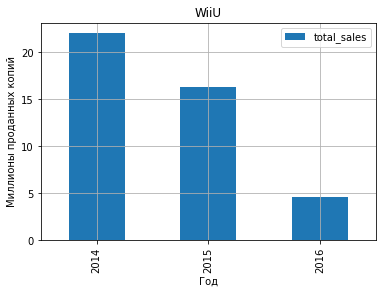

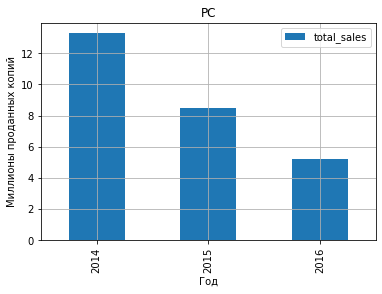

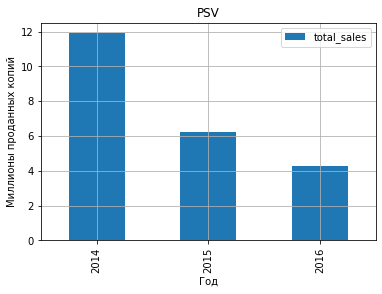

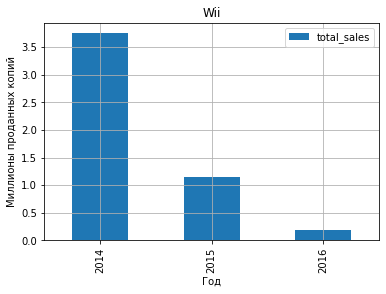

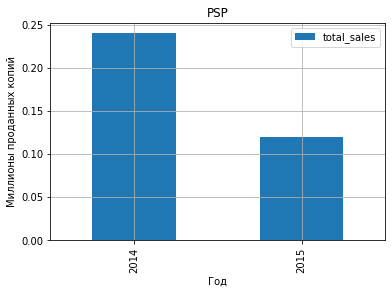

In [ ]:
for name in df_current_period['platform']:
    df[(df['platform'] == name) & (df['year_of_release'] > 2013)
      ].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum'
                   ).plot(kind='bar', grid=True, title=name)
    plt.xlabel('Год')
    plt.ylabel('Миллионы проданных копий')

Платформа PS4 — лидирует по продажам, платформа XOne — на втором месте.\
Платформы PS4 и XOne — растут, остальные падают\
Платформы 3DS, PS3, WiiU, PC, PSV — остаются потенциально прибыльными\
Составим список потенциально прибыльнымх платформ — **list_platforms**

In [ ]:
list_platforms = ['PS4', 'XOne', '3DS', 'PS3', 'WiiU', 'PC', 'PSV']

Отсортируем таблицу **df**, оставим только потенциально прибыльные платформы и продажи за актуальный период, создадим таблицу **good_df**

In [ ]:
good_df = df.query('platform in @list_platforms')
good_df = good_df[good_df['year_of_release'] > 2013].reset_index(drop=True)
good_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


Построим диаграммы размаха по глобальным продажам игр в разбивке по платформам.

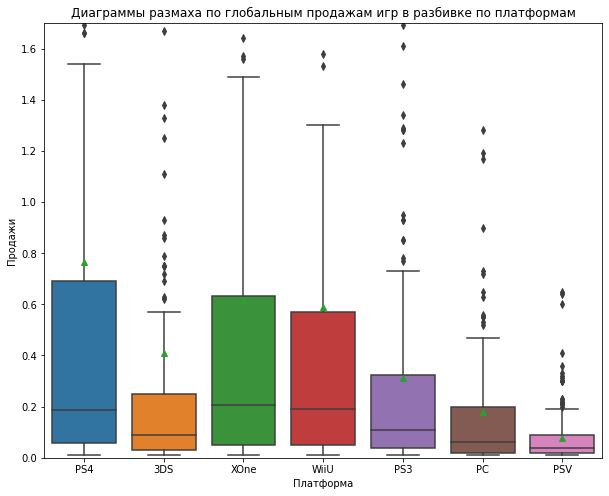

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x=good_df['platform'], y=good_df['total_sales'], showmeans = True)
plt.ylim(0, 1.7)
plt.title('Диаграммы размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

- На всех распределениях среднее больше чем медиана и имеются выбросы в положительную сторону, поэтому все эти платформы действительно потенциально прибыльны. Наибольший потенциал имеют платформы PS4 и XOne, т.к. их распределения имеют наиболее длинные усы в положительную сторону.

Посмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков. Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами.

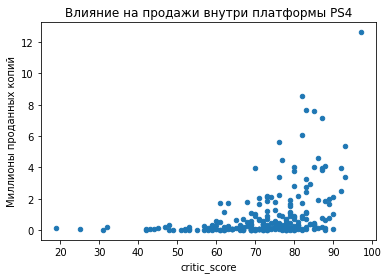

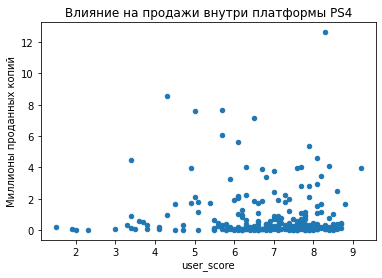

In [ ]:
good_df_PS4 = good_df.query('platform == "PS4"')
for name in ['critic_score', 'user_score']:
    good_df_PS4.plot(x=name, y='total_sales', kind='scatter')
    plt.title('Влияние на продажи внутри платформы PS4')
    plt.ylabel('Миллионы проданных копий')

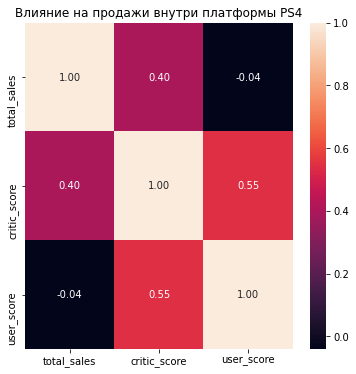

In [ ]:
df_corr_PS4 = good_df_PS4[['total_sales', 'critic_score', 'user_score']].corr()
plt.figure(figsize=(6,6))
sns.heatmap(df_corr_PS4, annot=True, fmt='.2f')
plt.title('Влияние на продажи внутри платформы PS4');

Между отзывами критиков и продажами существует слабая положительная корреляция.\
Между отзывами пользователей и продажами корреляция практически отсутствует.

Посчитаем корреляцию на других платформах.

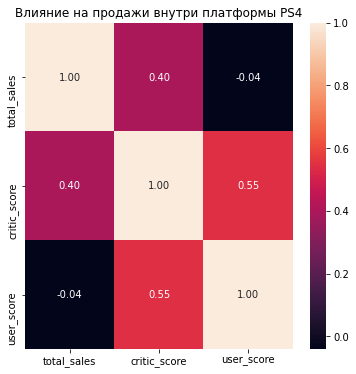

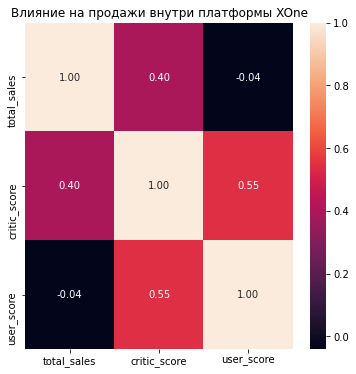

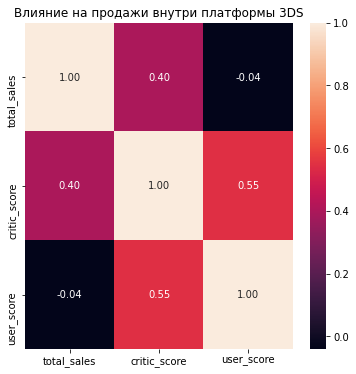

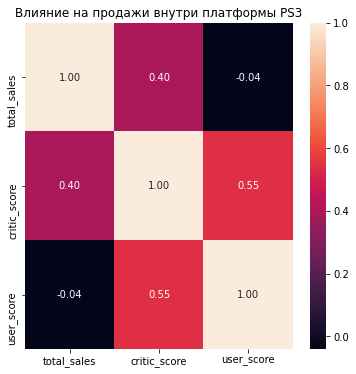

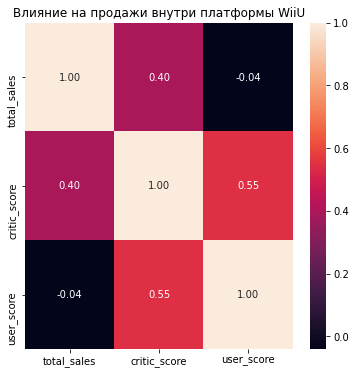

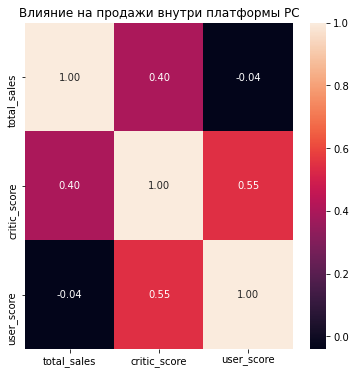

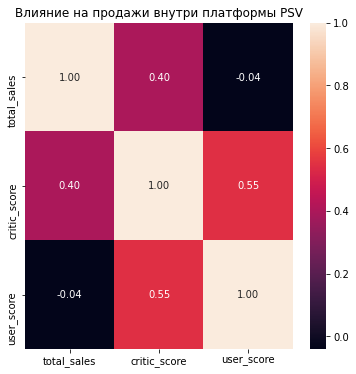

In [ ]:
for name in list_platforms:
    good_df_platform = good_df[good_df['platform'] == name]
    df_corr_platform = good_df_platform[['total_sales', 'critic_score', 'user_score']].corr()
    plt.figure(figsize=(6,6))
    sns.heatmap(df_corr_PS4, annot=True, fmt='.2f')
    plt.title(f'Влияние на продажи внутри платформы {name}');

- На платформах XOne и PS3 похожая ситуация, на остальных незначительно оличается.

Посмотрим на общее распределение игр по жанрам.

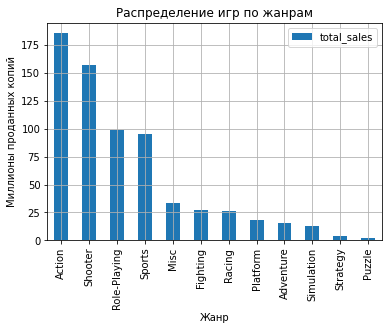

In [ ]:
good_df.pivot_table(index='genre', values='total_sales', aggfunc='sum'
                   ).sort_values('total_sales', ascending=False).plot(kind='bar', grid=True)
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Миллионы проданных копий');

- Самые высокие продажи в жанрах Action и Shooter, на втором месте Role-Playing и Sports.

## 4 Составление портрета пользователя каждого региона

Составим список столбцов `region_sales` — продажи по регионам.

In [ ]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales']

Для каждого региона выделим самые популярные платформы (топ-5) и посмотрим доли их продаж.

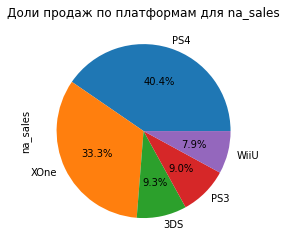

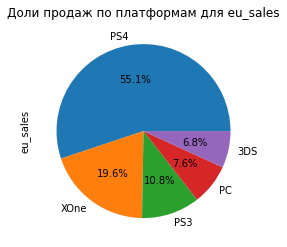

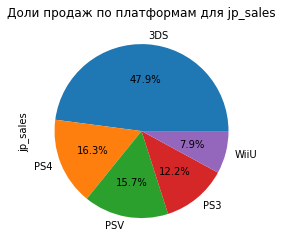

In [ ]:
for name in region_sales:
    good_df.pivot_table(index='platform', values=name, aggfunc='sum'
                       ).sort_values(by=name, ascending=False
                                    ).head().plot(kind='pie', y=name, legend=False, autopct='%1.1f%%')
    plt.title(f'Доли продаж по платформам для {name}');

- В Северной Америке самая популярная платформа PS4 — 40.4% продаж из топ-5, на втором месте XOne — 33.3% продаж
- В Европе самая популярная платформа PS4 — 55.1% продаж из топ-5, на втором месте XOne — 19.6% продаж
- В Японии самая популярная платформа 3DS — 47.9% продаж из топ-5, на втором месте PS4 — 16.3% продаж\
PS4 — самая популярная платформа в Северной Америке и Европе и в Японии на втором месте. XOne — на втором месте в Северной Америке и Европе, а в Японии она совсем не популярна, даже не входит в топ-5. 3DS — самая популярная платформа в Японии.

Для каждого региона выделим самые популярные жанры (топ-5) и посмотрим доли их продаж. 

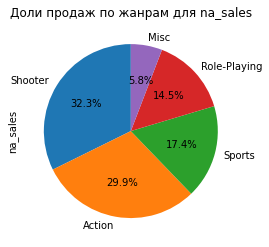

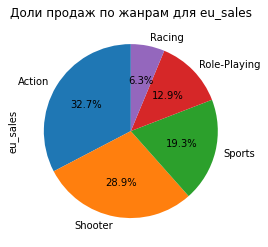

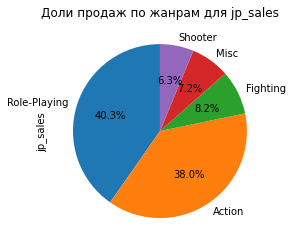

In [ ]:
for name in region_sales:
    good_df.pivot_table(index='genre', values=name, aggfunc='sum'
                       ).sort_values(by=name, ascending=False
                                    ).head().plot(kind='pie', y=name, legend=False, autopct='%1.1f%%', startangle=90)
    plt.title(f'Доли продаж по жанрам для {name}');

- В Северной Америке самый популярный жанр Shooter — 32.3% продаж из топ-5, на втором месте Action — 29.9% продаж
- В Европе самый популярный жанр Action — 32.7% продаж из топ-5, на втором месте Shooter — 28.9% продаж
- В Японии самый популярный жанр Role-Playing — 40.3% продаж из топ-5, на втором месте Action — 38.0% продаж\
В Северной Америке и Европе самые популярные жанры Shooter и Action, занимают примерно равные доли по продажам, на третьем месте жанр Sports, на четвертом — Role-Playing. В Японии самые популярные жанры Role-Playing и Action, остальные жанры не столь популярны.

Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

Расшифровка рейтинга ESRB:
- EC (Early Childhood) — для детей младшего возраста
- E (Everyone) — для всех
- E10+ (Everyone 10 and older) — для всех старше 10 лет
- T (Teen) — подросткам 13-19 лет
- M (Mature 17+) — от 17 лет
- AO (Adults only 18+) — только для взрослых
- K-A (Kids to Adults)— для детей и взрослых
- RP (Rating pending) — рейтинг ожидается

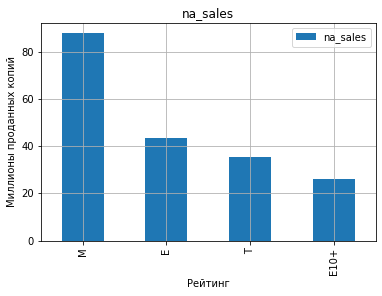

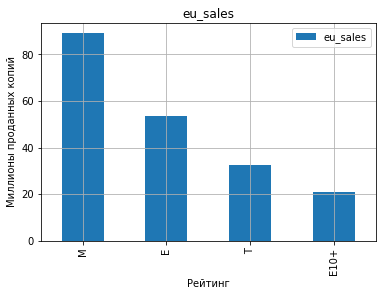

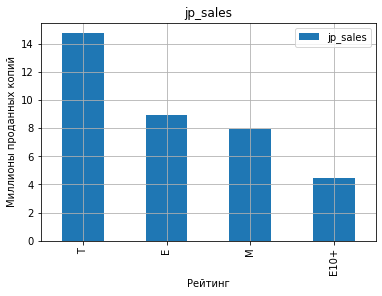

In [ ]:
for name in region_sales:
    good_df.pivot_table(index='rating', values=name, aggfunc='sum'
                       ).sort_values(by=name, ascending=False).plot(kind='bar', grid=True, title=name)
    plt.xlabel('Рейтинг')
    plt.ylabel('Миллионы проданных копий')

- В Северной Америке и Европе картина примерно одинакова, больше всего продаются игры с рейтингом "M"(от 17 лет), на втором месте с рейтингом "Е"(для всех), далее с рейтингом "Т"(подросткам 13-19 лет) и далее "E10+"(для всех старше 10 лет)
- В Японии на первом месте игры с рейтингом "Т"(подросткам 13-19 лет), на втором — с рейтингом "Е"(для всех), далее "M"(от 17 лет) и далее "E10+"(для всех старше 10 лет)

## 5 Проверка гипотез

Проверим гипотезу — средние пользовательские рейтинги платформ Xbox One и PC одинаковые.\
Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства.\
Сформулируем гипотезы:
- $H_0$ — средние пользовательские рейтинги платформ Xbox One и PC равны
- $H_1$ — средние пользовательские рейтинги платформ Xbox One и PC различаются

alpha = 0.05 — критический уровень статистической значимости, общепринятое значение в 5%.

In [ ]:
good_df.query('platform == "XOne"')['user_score'].describe()

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

In [ ]:
good_df.query('platform == "PC"')['user_score'].describe()

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

 Так как выборки разного размера, параметр **equal_var** возьмем как **False**

In [ ]:
alpha = 0.05

results = st.ttest_ind(good_df.query('platform == "XOne"')['user_score'],
                       good_df.query('platform == "PC"')['user_score'], equal_var = False, nan_policy='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


- Средние пользовательские рейтинги платформ Xbox One и PC равны.

Проверим гипотезу — средние пользовательские рейтинги жанров Action и Sports разные.\
Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства\
Сформулируем гипотезы:
- $H_0$ — средние пользовательские рейтинги жанров Action и Sports равны
- $H_1$ — средние пользовательские рейтинги жанров Action и Sports различаются

alpha = 0.05 — критический уровень статистической значимости, общепринятое значение в 5%.

In [ ]:
good_df.query('genre == "Action"')['user_score'].describe()

count    273.000000
mean       6.783516
std        1.386219
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.000000
Name: user_score, dtype: float64

In [ ]:
good_df.query('genre == "Sports"')['user_score'].describe()

count    107.000000
mean       5.402804
std        1.810059
min        0.200000
25%        4.250000
50%        5.700000
75%        6.750000
max        8.800000
Name: user_score, dtype: float64

Так как выборки разного размера, параметр **equal_var** возьмем как **False**

In [ ]:
alpha = 0.05

results = st.ttest_ind(good_df.query('genre == "Action"')['user_score'],
                       good_df.query('genre == "Sports"')['user_score'], equal_var = False, nan_policy='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7406996735370177e-11
Отвергаем нулевую гипотезу


- Средние пользовательские рейтинги жанров Action и Sports различаются.

## 6 Общий вывод

В результате анализа данных о продажах игр за актуальный период с 2014 по 2016 года включительно, были выявлены следующие закономерности:
- В целом по миру показыват рост только две платформы *PS4* и *XOne*, отальные платформы *3DS*, *PS3*, *WiiU*, *PC*, *PSV* — падают, но остаются потенциально прибыльными. Платформа *PS4* — лидирует по продажам, платформа *XOne* — на втором месте.\
В Северной Америке и Европе самая популярная плаформа *PS4*, на втором месте *XOne*.\
В Японии самая популярная плаформа *3DS*, на втором месте *PS4*. *XOne* в Японии не популярна.
- В целом по миру самые высокие продажи в жанрах *Action* и *Shooter*, на втором месте *Role-Playing* и *Sports*.
В Северной Америке и Европе самые популярные жанры *Shooter* и *Action*, занимают примерно равные доли по продажам, на третьем месте жанр *Sports*, на четвертом — *Role-Playing*.\
В Японии самые популярные жанры *Role-Playing* и *Action*, остальные жанры не столь популярны.
- В Северной Америке и Европе больше всего продаются игры с рейтингом "M"(от 17 лет), на втором месте с рейтингом "Е"(для всех), далее с рейтингом "Т"(подросткам 13-19 лет) и далее "E10+"(для всех старше 10 лет)\
В Японии на первом месте игры с рейтингом "Т"(подросткам 13-19 лет), на втором — с рейтингом "Е"(для всех), далее "M"(от 17 лет) и далее "E10+"(для всех старше 10 лет)
- Отзывы критиков незначительно влияют на продажи игр.
- Отзывы пользователей практически не влияют на продажи.\
- Исходя из проверки гипотез можно предположить, что средние пользовательские рейтинги платформ примерно равны, а средние пользовательские рейтинги жанров  различаются.




